## Imprting the Libraries

In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Load image data from MNIST Library

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Below we can find:

1.   Length of X_train
2.   Length of x_test
3.   Shape of every image
4.   How the image is represented in an 2D array

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Plotting the pictures of X_train[0] and x_test[0]

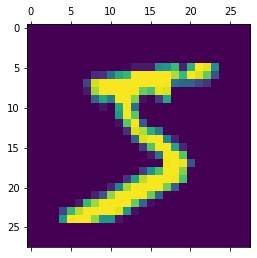

In [7]:
plt.matshow(X_train[0])

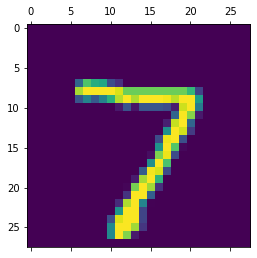

In [8]:
plt.matshow(X_test[0])

## Y_train[0] and y_test[0]

In [9]:
print(y_train[0],y_test[0])

5 7


## Scaling by dividing all the values by 255

In [10]:
X_train = X_train/255
X_test = X_test/255

## Flatten our training dataset X_train

In [11]:
X_train_flattened = X_train.reshape(len(X_train),len(X_train[0])*len(X_train[1]))

In [12]:
X_train_flattened.shape

(60000, 784)

## Flatten our training dataset X_test

In [13]:
X_test_flattened = X_test.reshape(len(X_test),len(X_test[0])*len(X_test[1]))

In [14]:
X_test_flattened.shape

(10000, 784)

## Creating a simple neural network with only an input layer and output layer

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4702 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2727 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2667 - accuracy: 0.9261


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2698 - accuracy: 0.9246


[0.26979586482048035, 0.9246000051498413]

In [17]:
model.predict(X_test_flattened)

array([[1.86362565e-02, 3.22362894e-07, 3.87360752e-02, ...,
        9.99860287e-01, 1.11447096e-01, 6.81471586e-01],
       [5.22414207e-01, 5.78111410e-03, 9.99154449e-01, ...,
        1.84945440e-12, 1.50016695e-01, 1.50174373e-09],
       [2.98768282e-04, 9.93703067e-01, 5.71625113e-01, ...,
        1.58220559e-01, 4.13187504e-01, 3.90323997e-02],
       ...,
       [2.78117818e-06, 4.37790368e-06, 5.57750463e-04, ...,
        2.74727881e-01, 5.18465161e-01, 7.98974514e-01],
       [1.32501125e-04, 1.67459249e-04, 9.23768021e-05, ...,
        4.67657337e-05, 6.77111745e-01, 1.14055438e-04],
       [9.47448611e-03, 3.69450054e-10, 9.25155878e-02, ...,
        2.53551491e-08, 2.23278999e-04, 8.09261678e-07]], dtype=float32)

## Prediction for 1st image

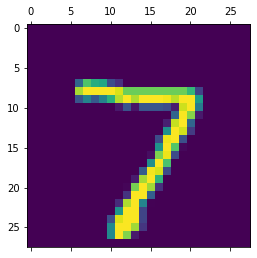

In [18]:
plt.matshow(X_test[0])

In [19]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([1.86362565e-02, 3.22362894e-07, 3.87360752e-02, 9.43153799e-01,
       3.07092071e-03, 1.06309325e-01, 1.74230661e-06, 9.99860287e-01,
       1.11447096e-01, 6.81471586e-01], dtype=float32)

## y_pred here shows the score for each number
## We need to find the max score to get the predicted output for the 1st number

In [20]:
np.argmax(y_pred[0])

7

### So the prediction is perfect as the x_test image shows a 7 and the result here shows a 7 as well

# Confusion Matrix y_test vs y_pred

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    1,    0,    4,    7,    3,    2,    0],
       [   0, 1112,    2,    2,    0,    1,    4,    2,   12,    0],
       [   8,   12,  899,   20,   11,    4,   13,   14,   48,    3],
       [   3,    0,   12,  929,    0,   18,    4,   13,   24,    7],
       [   1,    1,    2,    1,  917,    0,   13,    4,    9,   34],
       [  10,    3,    2,   40,   11,  761,   19,    7,   31,    8],
       [  12,    3,    4,    1,    8,   10,  915,    2,    3,    0],
       [   1,    5,   22,    4,    8,    0,    0,  956,    3,   29],
       [   5,    8,    5,   18,    9,   18,   10,   12,  884,    5],
       [  10,    7,    1,    9,   30,    5,    0,   28,    8,  911]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

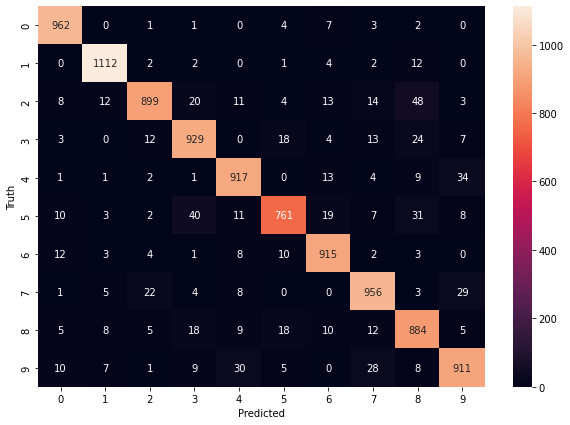

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding a hidden layer to the neural network


In [31]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2720 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1212 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0854 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9843


In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9774


[0.07572781294584274, 0.977400004863739]

Text(69.0, 0.5, 'Truth')

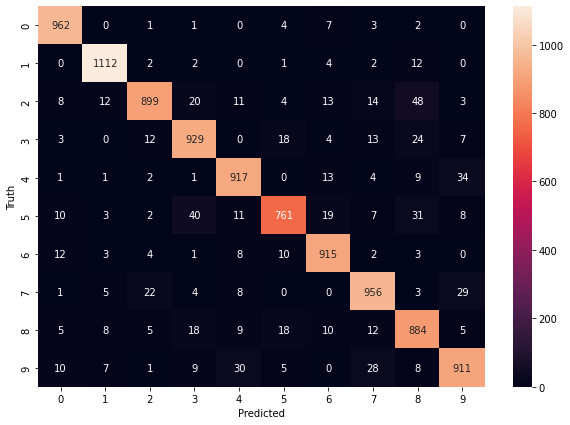

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')